<a href="https://colab.research.google.com/github/CarolineMNves/MVP_An-lise_de_dados/blob/main/MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP: Análise de Dados e Boas Práticas**
---

Pontifícia Universidade Católica do Rio de Janeiro- PUC-RJ

Professores: Hugo Villamizar e Tatiana Escovedo

Aluna: Caroline Neves

#**Introdução**
---

Este documento foi realizado para contemplar a avaliação do módulo de Análise de Dados e Boas Práticas, do curso de Pós-Graduação em Ciência de Dados e Analytics da instituição Pontifícia Universidade Católica do Rio de Janeiro.

O notebook contempla a análise dos dados "Climate Change: Earth Surface Temperature Data" disponíveis no site [Kaggle](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/data), em etapas que vão desde o carregamento dos dados, análise das estatísticas descritivas, visualizações e pré-processamento dos dados para o modelo ARIMA.

Tendo em vista o contexto de mudanças climáticas, as análises realizadas tinham como intuito compreender a variação das médias de temperatura globais, ao longo do tempo, em diferente regiões do globo. Além disso, por tratar-se de uma série temporal, os dados foram pré-processados para utilização do modelo ARIMA como o intuito de realizar previsões a respeito média de temperatura. A criação do modelo não é considerada neste notebook.

#**O conjunto de dados**

O  conjunto  de dados “Climate Change: Earth Surface Temperature Data” é resultado de uma reorganização de uma compilação realizada pela Berkeley Earth, que está filiada ao Lawrence Berkeley National Laboratory. O ‘Estudo da Temperatura da Superfície da Terra’ da Berkeley Earth, combina 1,6 bilhão de relatórios de temperatura de 16 arquivos pré-existentes.
No site Kaggle, são disponibilizados vários arquivos, mas neste trabalho apenas os arquivos “GlobalTemperatures.csv” e “GlobalLandTemperaturesByCountry.csv” foram utilizados. Os atributos de cada arquivo estão descritos a seguir:






> **GlobalTemperatures.csv**



***dt***
Contém os valores de dia, mês e ano. Inicia em 1750 para a temperatura média da terra e, 1850 para as temperaturas máxima e mínima da terra e as temperaturas globais dos oceanos e da terra

***Land Average Temperature***
Contém os valores de temperatura média global da terra em graus Celsius

***Land Average Temperature Uncertainty***
Contém os valores do intervalo de confiança de 95% em torno da média

***LandMax Temperature***
Contém os valores de temperatura máxima média global da terra em graus Celsius

***LandMaxTemperatureUncertainty***
Contém os valores do intervalo de confiança de 95% em torno da temperatura máxima da terra

***Land Min Temperature***
Contém os valores de temperatura mínima média global da terra em graus Celsius

***LandMinTemperatureUncertainty***
Contém os valores do intervalo de confiança de 95% em torno da temperatura mínima da terra

***Land And Ocean Average Temperature***
Contém os valores de temperatura média global da terra e do oceano em Celsius

***Land And Ocean Average Temperature Uncertainty***
Contém os valores do intervalo de confiança de 95% em torno da temperatura média global da terra e do oceano





> **GlobalLandTemperaturesByCountry.csv**



***dt***	Contém os valores de dia, mês e ano.

***AverageTemperature***
Contém os valores de temperatura média para o país em graus Celsius

***AverageTemperatureUncertainty***
Contém os valores do intervalo de confiança de 95% em torno da média

***Country***
Contém os valores dos países para quais médias de temperatura correspondem




#**Importando bibliotecas e carregando os arquivos**
---
Primeiramente, realizou-se um pip install para instalar a biblioteca GeonamesCache, que é uma ferramenta em Python que fornece acesso a dados geográficos do serviço online GeoNames. GeoNames é uma base de dados geográficos e de nomes geográficos que abrange o mundo todo. Essa base de dados contém informações sobre países, estados, cidades, códigos postais, entre outros elementos geográficos. O intuito da utilização desta biblioteca será resgatar os nomes dos continentes dos dados, tendo em vista que apenas os nomes dos países estão disponíveis.

Em seguida, importaram-se as bibliotecas essenciais para manipulação e visualização de dados, como pandas, numpy, matplotlib, seaborn e plotly. Além disso, foram importadas ferramentas específicas para análise de séries temporais, como adfuller, plot_acf e plot_pacf do statsmodels.

Os arquivos “GlobalTemperatures.csv” e “GlobalLandTemperaturesByCountry.csv” foram carregados no repositório do GitHub, no qual também está disponível este notebook. As URLs que contêm conjuntos de dados CSV referentes às temperaturas globais, foram instanciadas como “url1” e “url2”. Os conjuntos foram carregados em DataFrames usando a biblioteca pandas, criando os dfs 'temp_pais' e 'temp_global'.

Para garantir que os dados foram carregados corretamente, exibiu-se as primeiras linhas de ambos os DataFrames utilizando '.head()'. Posteriormente, as dimensões (número de linhas e colunas) dos conjuntos foram apresentadas utilizando o método “.shape”.


In [107]:
#Configurando a não exibição de warnings
import warnings
warnings.filterwarnings("ignore")

In [108]:
pip install GeonamesCache

In [109]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geonamescache import GeonamesCache #dados geográficos do serviço online GeoNames.
import plotly.graph_objects as go #biblioteca para a criação de visualizações interativas e dinâmicas.
from plotly.subplots import make_subplots #criar subplots
import plotly.express as px #graficos interativos
from statsmodels.tsa.stattools import adfuller #modelagem estatística
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #visualização de funções de autocorrelação (ACF) e autocorrelação parcial (PACF) em séries temporais.


In [110]:
#Carregando os arquivos
url1= 'https://raw.githubusercontent.com/CarolineMNves/MVP_An-lise_de_dados/main/GlobalLandTemperaturesByCountry.csv' #Arquivo de temperatura média global da Terra por país
url2= 'https://raw.githubusercontent.com/CarolineMNves/MVP_An-lise_de_dados/main/GlobalTemperatures.csv' #Arquivo Temperatura média global da Terra


#Lendo o arquivo
temp_pais= pd.read_csv(url1, delimiter= ',') #Arquivo de temperatura média global da Terra por país
temp_global= pd.read_csv(url2, delimiter= ',' ) #Arquivo Temperatura média global da Terra

In [111]:
#Verificando se os arquivo foram carregados corretamente
temp_pais.head()



,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [112]:
#Verificando se os arquivo foram carregados corretamente
temp_global.head()


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
#Verificando as dimensões do dataset
temp_pais.shape

(577462, 4)

O df 'temp_pais' possui 577462 linhas e 4 colunas

In [114]:
#Verificando as dimensões do dataset
temp_global.shape

(3192, 9)

O df 'temp_global' possui 3192 linhas e 9 colunas

#**Análise inicial**
---

Com propósito de verificar informações essenciais e entender a estrutura geral dos dados, identificando possíveis problemas, como valores nulos ou tipos de dados inadequados; sobre dois DataFrames, temp_pais e temp, utilizou-se o método ‘.info()’ da biblioteca pandas. Esse método forneceu um resumo conciso, incluindo o número de entradas não nulas, o tipo de dados de cada coluna e o uso de memória.

In [117]:
#Verificando as informações do df
temp_pais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [118]:
#Verificando as informações do df
temp_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


Dessa forma, entendeu-se que nos dados de 'temp_pais' as colunas ‘dt’ e ‘country’ possuem 577462 valores não- nulos e são do tipo ‘object’. As colunas ‘AverageTemperature’ e ‘AverageTemperatureUncertainty’ apresentaram 544811 e 545550 dados não-nulos, respectivamente e, os dados presentes nestas colunas são do tipo float.

Em relação ao df 'temp' nas colunas ‘LandMaxTemperature’, ‘LandMaxTemperatureUncertainty’, ‘LandMinTemperature’, ‘LandMinTemperatureUncertainty ‘,  ‘LandAndOceanAverageTemperature ‘, ‘LandAndOceanAverageTemperature ‘, têm-se 1992 dados não-nulos e são do tipo float. Já as colunas LandAverageTemperature’ e ‘LandAverageTemperatureUncertainty ‘ possuem 3180 dados não nulos, também sendo do tipo float. A coluna dt possui 3192 dados não-nulos, sendo do tipo object.



A fim de visualizar a contagem de nulos em cada coluna dos dfs, utilizou-se o método '.isnull()' do pandas para identificar valores nulos nos dfs e, em seguida, o método sum() para contar a quantidade de valores nulos em cada coluna.

In [115]:
#Verificando nulls nos dados
temp_pais.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [116]:
#Verificando nulls nos dados
temp_global.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

Dado que os dados que são relevantes para a análise referem-se aos atributos de 'AverageTemperature' do df "temp_pais" e LandAverageTemperature do df "temp", vamos remover os dados nulos dos dfs. Considerando os intervalos de data dos dados, e a dimensão do df, a decisão considerou que a limpeza dos dados nulos não afetariam os resultados das análises, ou afetariam minimamente. Todavia, seria interessante testar outras abordagens, como preencher os dados faltantes com as médias calculadas para cada coluna.

Dessa forma, removeu-se apenas as linhas nas quais as colunas 'AverageTemperature' e 'LandAverageTemperature' de seus respectivos dfs, estavam vazias. Para tanto, utilizou-se a função '.dropna' com o parâmetro "subset" para definir em quais colunas a função deveria buscar os valores nulos.
Para validar os resultados, utilizou-se novamente o método '.isnull()' do pandas para identificar valores nulos nos dfs e, em seguida, o método sum() para contar a quantidade de valores nulos em cada coluna.

In [119]:
# Removendo linhas onde 'AverageTemperature' está vazia
temp_pais= temp_pais.dropna(subset= ['AverageTemperature'])

In [120]:
# Removendo linhas onde 'AverageTemperature' está vazia
temp_global= temp_global.dropna(subset= ['LandAverageTemperature'])

In [121]:
#Verificando nulls nos dados
temp_pais.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [122]:
#Verificando nulls nos dados
temp_global.isnull().sum()

dt                                              0
LandAverageTemperature                          0
LandAverageTemperatureUncertainty               0
LandMaxTemperature                           1188
LandMaxTemperatureUncertainty                1188
LandMinTemperature                           1188
LandMinTemperatureUncertainty                1188
LandAndOceanAverageTemperature               1188
LandAndOceanAverageTemperatureUncertainty    1188
dtype: int64

Para que as análises relacionadas as datas sejam realizadas de forma mais robusta e eficiente, fez-se necessário a conversão das colunas 'dt' nos dois dfs, que possuem as informações de dia, mês e ano do registro das temperaturas. Além disso, criou-se colunas separadas para os anos e meses.

Dessa forma, com a função "pd.to_datetime", converteu-se os valores das colunas "dt" para o formato datetime. Fez-se uso da função '.info()' para verificar se as colunas foram convertidas corretamente.

Em seguida, as expressões 'dt.year' e 'dt.month' foram utilizadas para acessar os anos e meses presentes das colunas 'dt', criando uma nova coluna para os valores acessados.

Utilizou-se '.head(10)', a fim de  visualizar as 10 primeiras linhas de cada df para validação dos resultados das novas colunas "year" e "month".

In [123]:
#Convertendo a coluna dt, que possui as informações de data para o formato datetime
temp_pais['dt']= pd.to_datetime(temp_pais['dt'])

temp_global['dt']= pd.to_datetime(temp_global['dt'])

In [124]:
#Verificando se a conversão ocorreu corretamente
temp_pais['dt'].info()

<class 'pandas.core.series.Series'>
Int64Index: 544811 entries, 0 to 577460
Series name: dt
Non-Null Count   Dtype         
--------------   -----         
544811 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.3 MB


In [125]:
#Verificando se a conversão ocorreu corretamente
temp_global['dt'].info()

<class 'pandas.core.series.Series'>
Int64Index: 3180 entries, 0 to 3191
Series name: dt
Non-Null Count  Dtype         
--------------  -----         
3180 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 49.7 KB


In [126]:
#Criando novas colunas 'Year' e 'month' para o df temp_pais
temp_pais["year"]= temp_pais['dt'].dt.year
temp_pais["month"]= temp_pais['dt'].dt.month

#Criando novas colunas 'Year' e 'month' para o df temp
temp_global["year"]= temp_global['dt'].dt.year
temp_global["month"]= temp_global['dt'].dt.month

In [127]:
#Visualizando as 10 primeiras linhas do df
temp_pais.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,month
0,1743-11-01,4.384,2.294,Åland,1743,11
5,1744-04-01,1.530,4.680,Åland,1744,4
6,1744-05-01,6.702,1.789,Åland,1744,5
7,1744-06-01,11.609,1.577,Åland,1744,6
8,1744-07-01,15.342,1.410,Åland,1744,7
10,1744-09-01,11.702,1.517,Åland,1744,9
11,1744-10-01,5.477,1.862,Åland,1744,10
12,1744-11-01,3.407,1.425,Åland,1744,11
13,1744-12-01,-2.181,1.641,Åland,1744,12
14,1745-01-01,-3.850,1.841,Åland,1745,1


In [128]:
#Visualizando as 10 primeiras linhas do df
temp_global.head(10)


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN,1750,6
6,1750-07-01,15.868,1.911,NaN,NaN,NaN,NaN,NaN,NaN,1750,7
7,1750-08-01,14.750,2.231,NaN,NaN,NaN,NaN,NaN,NaN,1750,8
8,1750-09-01,11.413,2.637,NaN,NaN,NaN,NaN,NaN,NaN,1750,9
9,1750-10-01,6.367,2.668,NaN,NaN,NaN,NaN,NaN,NaN,1750,10


Para encontrar o ano de início e término dos dados, utilizou-se as funções '.dt.year.min()' e '.dt.year.max()'. Dessa forma, as funções calcularam os valores mínimos e máximos dos anos presentes nas colunas 'dt' dos dfs. A função 'print()', foi utilizada para exibir os resultados calculados.

In [129]:
#Encontrando o ano de início e término
ano_inicio= temp_pais['dt'].dt.year.min()
ano_termino= temp_pais['dt'].dt.year.max()

ano_inicio_global= temp_global['dt'].dt.year.min()
ano_termino_global= temp_global['dt'].dt.year.max()



print(f"Ano de início do df temp_pais: {ano_inicio}, Ano de término do df temp_pais: {ano_termino}")
print(f"Ano de início do df temp_global: {ano_inicio_global}, Ano de término do df temp_global: {ano_termino_global}")

Ano de início do df temp_pais: 1743, Ano de término do df temp_pais: 2013
Ano de início do df temp_global: 1750, Ano de término do df temp_global: 2015


Para visualizar as estatísticas descritivas dos dados, utilizou-se a função '.describe()' que exibe os valores da contagem dos dados, média, devio padrão, mínimo; os percentis 25%, 50% e 75% e o máximo dos atributos. Além disso, utilizou-se a função '.mode()', para verificar os valores modais dos atributos.

In [130]:
#Verificando as estatísticas descritivas do df 'temp_pais'
temp_pais.describe()

,AverageTemperature,AverageTemperatureUncertainty,year,month
count,544811.000000,544811.000000,544811.000000,544811.000000
mean,17.193354,1.019190,1913.145696,6.491932
std,10.953966,1.202634,64.346358,3.451034
min,-37.658000,0.052000,1743.000000,1.000000
25%,10.025000,0.323000,1869.000000,3.000000
50%,20.901000,0.571000,1919.000000,6.000000
75%,25.814000,1.207000,1966.000000,9.000000
max,38.842000,15.003000,2013.000000,12.000000


Ao analisarmos as estatísticas da coluna 'AverageTemperature', que representa a temperatura média, observamos que a média global é de aproximadamente 17.19 graus Celsius, com uma variação significativa de -37.66 a 38.84 graus Celsius. A incerteza associada a essas medições, indicada pela coluna 'AverageTemperatureUncertainty', possui uma média de cerca de 1.02 graus Celsius.

No que diz respeito aos anos registrados, as observações abrangem um período extenso, desde 1743 até 2013. Quanto aos meses, as medições abrangem todos os meses do ano, representados numericamente de 1 a 12.


In [131]:
#Verificando as estatísticas descritivas do df temp_global
temp_global.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,3180.000000,3180.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532,1882.994654,6.495283
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587,76.519632,3.453776
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000,1750.000000,1.000000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000,1817.000000,3.000000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000,1883.000000,6.000000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000,1949.000000,9.000000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000,2015.000000,12.000000


Observou-se que a coluna 'LandAverageTemperature' indicou uma média global de aproximadamente 8.37 graus Celsius, com uma amplitude de -2.08 a 19.02 graus Celsius. A incerteza associada a essas medições, representada por 'LandAverageTemperatureUncertainty', apresentou uma média de cerca de 0.94 graus Celsius.
As temperaturas máximas ('LandMaxTemperature') e mínimas ('LandMinTemperature') oferecem uma visão mais detalhada, mostraram médias em torno de 14.35 e 15.21 graus Celsius, respectivamente. A coluna 'LandAndOceanAverageTemperature' representou uma média combinada de temperatura em terra e oceano, registrando uma média de 15.21 graus Celsius.
Os dados abrangem o período de 1750 a 2015, oferecendo uma visão histórica abrangente.


Os valores modais, em estatística, referem-se aos valores que aparecem com maior frequência em um conjunto de dados. Dessa forma, as próximas 3 células de código utilizaram a função '.mode()', para calcular os valores modais na colunas 'AverageTemperature', 'LandAverageTemperature' e 'LandMinTemperature', respectivamente.

In [132]:
#Verficando a moda da coluna AverageTemperature
temp_pais['AverageTemperature'].mode()

0    26.864
Name: AverageTemperature, dtype: float64

In [133]:
#Verficando a moda da coluna LandAverageTemperature
temp_global['LandAverageTemperature'].mode()

0    13.293
1    13.765
Name: LandAverageTemperature, dtype: float64

In [134]:
#Verficando a moda da coluna  LandMinTemperature
temp_global['LandMinTemperature'].mode()

0   -1.139
1    7.818
2    7.892
3    8.161
4    8.184
Name: LandMinTemperature, dtype: float64

In [135]:
#Verficando a moda da coluna LandMaxTemperature
temp_global['LandMaxTemperature'].mode()

0      8.555
1     10.781
2     11.411
3     17.196
4     17.289
5     17.713
6     19.360
7     19.628
8     19.753
9     19.850
10    19.987
11    20.037
Name: LandMaxTemperature, dtype: float64

No df temp_pais estão disponíveis as informações dos países para os quais as medidas de média de temperaturas são apresentadas. Para realizar algumas análises da distribuição da média de temperatura, decidiu-se criar uma coluna com o atributo de continente para os países disponíveis no df.
Para tanto, construiu-se uma função que percorresse os valores dos país e preenche-se a coluna criada "Continent" para o continente correspondente.
A fim de diminuir o tempo de processamento, criou-se um novo df, a partir dos valores unicos presentes na coluna "Country" do df "temp_pais", para aplicar a função.

In [136]:
#Obtendo os valores únicos dos países presentes na coluna Country
paises= temp_pais['Country'].unique()

#Criando um df com a coluna 'pais'
paises_df= pd.DataFrame({'pais': paises})

In [137]:
#Exibindo as colunas do df criado
paises_df.columns

Index(['pais'], dtype='object')

In [138]:
#Exibindo as primeiras linhas do df criado
paises_df.head()

,pais
0,Åland
1,Afghanistan
2,Africa
3,Albania
4,Algeria


In [139]:
#Exibindo as dimensões do df criado
paises_df.shape

(242, 1)

In [140]:
#Definindo uma função para obter o continente de um país usando a biblioteca geonamescache
def descobrindo_continente(country):
    gc= GeonamesCache() #Instanciando a classe GeonamesCache
    countries= gc.get_countries_by_names() #Obtendo informações sobre os países usando a instância da GeonamesCache

    try: #Tentando acessar as informações do país no dicionário countries
        country_info= countries[country]
        if country_info:  #Verificando se há informações sobre o país
            continent= country_info['continentcode'] #Obtendo o código do continente a partir das informações do país
            return continent
        else: #Se não houver informações sobre o país, retorna None
            return None
    except KeyError: #Se ocorrer uma exceção KeyError, retorna None
        return None

In [141]:
#Aplicando a função que preenche os valores dos continentes
paises_df['continent']= paises_df['pais'].apply(descobrindo_continente)

In [142]:
#Verificando os resultados
paises_df['continent'].unique()

array([None, 'AS', 'EU', 'AF', 'OC', 'NA', 'SA'], dtype=object)

Para validar o resultado da função 'descobrindo_continente',  utilizou-se a função '.unique()' na coluna 'continent'. Todavia, notou-se que a coluna apresentou os valores 'None'. Como definido na função, este valor deveria ser retornado caso as informações sobre o país não estivessem disponíveis ou ocorresse algum erro durante a busca.
Para a correção dos valores None, filtrou-se as linhas que apresentavam os respectivos valores, criando uma nova df chamada 'paises_df_nulls'. Verificou-se os países presentes no df criado com o método '.unique()'. Por fim, criou-se uma nova função para preencher os valores dos continentes. Para o preenchimento correto, fez-se a busca manual dos valores de continente no site [Geonames](https://www.geonames.org/countries/) para países presentes no df 'paises_df_nulls'.
Por fim, preencheu-se a coluna de continentes do df 'paises_df' com os valores corrigidos no 'paises_df_nulls'

In [143]:
#Filtrando linhas onde a coluna 'continent' é nula
paises_df_nulls= paises_df[paises_df['continent'].isna()]

In [144]:
#Exibindo informações sobre do resultado
paises_df_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 237
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pais       45 non-null     object
 1   continent  0 non-null      object
dtypes: object(2)
memory usage: 1.1+ KB


In [145]:
#Exibindo os países únicos na coluna 'pais' do df
paises_df_nulls['pais'].unique()

array(['Åland', 'Africa', 'Antigua And Barbuda', 'Asia', 'Baker Island',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Burma', "Côte D'Ivoire", 'Cape Verde',
       'Congo (Democratic Republic Of The)', 'Congo', 'Curaçao',
       'Czech Republic', 'Denmark (Europe)', 'Europe',
       'Falkland Islands (Islas Malvinas)',
       'Federated States Of Micronesia', 'France (Europe)',
       'French Southern And Antarctic Lands', 'Gaza Strip',
       'Guinea Bissau', 'Heard Island And Mcdonald Islands',
       'Isle Of Man', 'Kingman Reef', 'Macau', 'Macedonia',
       'Netherlands (Europe)', 'North America', 'Oceania', 'Palestina',
       'Palmyra Atoll', 'Saint Barthélemy', 'Saint Kitts And Nevis',
       'Saint Pierre And Miquelon', 'Saint Vincent And The Grenadines',
       'Sao Tome And Principe', 'South America',
       'South Georgia And The South Sandwich Isla',
       'Svalbard And Jan Mayen', 'Swaziland', 'Trinidad And Tobago',
       'Turks And Caic

In [146]:
#Criando uma função para corrigir a coluna de continente, preenchendo os valores de continente para os países que se encontram no df paises_df_nulls
def correcao_continente(pais):
  #Verificando se o país está na lista de exceções e atribuindo o continente correto
    if pais in ['Åland','Bonaire, Saint Eustatius And Saba','Baker Island',
               'Bosnia And Herzegovina', 'Czech Republic', 'Denmark (Europe)',
                'Europe', 'Isle Of Man', 'Kingman Reef', 'Macedonia',  'Netherlands (Europe)',
                'United Kingdom (Europe)','Svalbard And Jan Mayen','France (Europe)']:
        return 'EU'

    elif pais in['Swaziland', 'Africa', "Côte D'Ivoire",'Cape Verde','Congo (Democratic Republic Of The)',
                 'Congo','Guinea Bissau','Sao Tome And Principe']:
        return 'AF'

    elif pais in['Antigua And Barbuda','Curaçao','North America','Saint Barthélemy',
                 'Saint Kitts And Nevis','Saint Pierre And Miquelon','Saint Vincent And The Grenadines',
                 'Trinidad And Tobago','Turks And Caicas Islands','Virgin Islands']:
        return 'NA'

    elif pais in['Falkland Islands (Islas Malvinas)','French Southern And Antarctic Lands', 'South America']:
        return 'SA'

    elif pais in['South Georgia And The South Sandwich Isla','Heard Island And Mcdonald Islands']:
        return 'AN'

    elif pais in['Asia','Burma','Gaza Strip', 'Palestina', 'Macau']:
        return 'AS'

    elif pais in['Federated States Of Micronesia','Oceania','Palmyra Atoll']:
        return 'OC'
    else:
        return   # Retornar o próprio país se não estiver na lista


In [147]:
#Aplicando a função preenche os continentes
paises_df_nulls['continent'] = paises_df_nulls['pais'].apply(correcao_continente)

In [148]:
#Verificando os resultados
paises_df_nulls['continent'].unique()

array(['EU', 'AF', 'NA', 'AS', 'SA', 'OC', 'AN'], dtype=object)

In [149]:
# Preencher valores nulos em paises_df com valores de paises_df_nulls
paises_df['continent'].fillna(paises_df_nulls['continent'], inplace= True)

In [150]:
#Verificando os valores unicos contidos na coluna 'continent'
paises_df['continent'].unique()

array(['EU', 'AS', 'AF', 'OC', 'NA', 'SA', 'AN'], dtype=object)

In [151]:
#Verificando as dimensões do df
paises_df.shape

(242, 2)

Ao aplicar o método '.unique()' na coluna 'continent' após a correção, não verificamos nenhum valor nulo. Além disso, as dimensões do df 'paises_df' não foram alteradas. Dessa forma, conclui-se que a correção foi bem-sucedida.


Com o df 'paises_df', pode-se obter as informações dos continentes para os países. Para preencher os valores dos continentes para cada pais no df 'temp_pais', utilizou-se a função 'pd.merge' para combiná-lo com o df 'paises_df', com base nas colunas 'Country' e 'pais'. O parâmetro 'how=left' foi necessário para preservar todas as linhas do df 'temp_pais' e adicionar as informações do df 'paises_df' quando as colunas coincidirem.
As funções '.value_counts()' e '.unique()', foram utilizadas para validar os resultados da coluna 'continent'

In [152]:
#Merge com o DataFrame temp_pais
temp_pais= pd.merge(temp_pais, paises_df, left_on='Country', right_on='pais', how='left')

In [153]:
#Verificando o resultado
temp_pais.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,month,pais,continent
0,1743-11-01,4.384,2.294,Åland,1743,11,Åland,EU
1,1744-04-01,1.530,4.680,Åland,1744,4,Åland,EU
2,1744-05-01,6.702,1.789,Åland,1744,5,Åland,EU
3,1744-06-01,11.609,1.577,Åland,1744,6,Åland,EU
4,1744-07-01,15.342,1.410,Åland,1744,7,Åland,EU


In [154]:
#Removendo a coluna pais do df
temp_pais= temp_pais.drop(columns= ['pais'], axis= 1)

In [155]:
#Verificando o resultado
temp_pais.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,month,continent
0,1743-11-01,4.384,2.294,Åland,1743,11,EU
1,1744-04-01,1.530,4.680,Åland,1744,4,EU
2,1744-05-01,6.702,1.789,Åland,1744,5,EU
3,1744-06-01,11.609,1.577,Åland,1744,6,EU
4,1744-07-01,15.342,1.410,Åland,1744,7,EU
5,1744-09-01,11.702,1.517,Åland,1744,9,EU
6,1744-10-01,5.477,1.862,Åland,1744,10,EU
7,1744-11-01,3.407,1.425,Åland,1744,11,EU
8,1744-12-01,-2.181,1.641,Åland,1744,12,EU
9,1745-01-01,-3.850,1.841,Åland,1745,1,EU


In [156]:
#Verificando o resultado
temp_pais['continent'].unique()

array(['EU', 'AS', 'AF', 'OC', 'NA', 'SA', 'AN'], dtype=object)

In [157]:
#Verificando o resultado
temp_pais['continent'].value_counts()

EU    177344
AS    108058
AF    106428
NA     87728
OC     32791
SA     30205
AN      2257
Name: continent, dtype: int64

Para a análise, também fez-se importante uma coluna com a informação do hemisfério, levando em consideração que as 4 estações do ano ocorrem em períodos diferentes em cada hemisfério.
Para tanto, criou-se uma coluna 'Hemisferio' no df 'temp_pais', atribuindo o valor 'Norte' para todas as linhas. Em seguida, atualizou-se a coluna utilizando a função '.loc' para localizar as linhas aonde os valores da coluna 'continent' estão presentes na lista 'SA', 'AF', 'OC', 'AN' e, em seguida, atualizar os valores correspondentes na coluna 'Hemisfério' para 'Sul'


In [158]:
#Criando uma coluna 'Hemisfério' e inicializando todos os valores como 'Norte'
temp_pais['Hemisfério']= 'Norte'

#Atualizando os valores da coluna 'Hemisfério' para 'Sul' onde o continente está na lista ['SA', 'AF', 'OC', 'AN']
temp_pais.loc[temp_pais['continent'].isin(['SA', 'AF', 'OC', 'AN']), 'Hemisfério']= 'Sul'

In [159]:
#Exibindo a contagem de valores únicos na coluna 'Hemisfério'
temp_pais['Hemisfério'].value_counts()

Norte    373130
Sul      171681
Name: Hemisfério, dtype: int64

#**Visualizações**
---

**1- Contagem de Informações de Temperatura por Continente**

Para visualizar a distribuição dos dados de temperatura disponíveis por continente, criou-se um gráfico de barras a partir da contagem dos valores da coluna 'Continent' no df 'temp_pais'

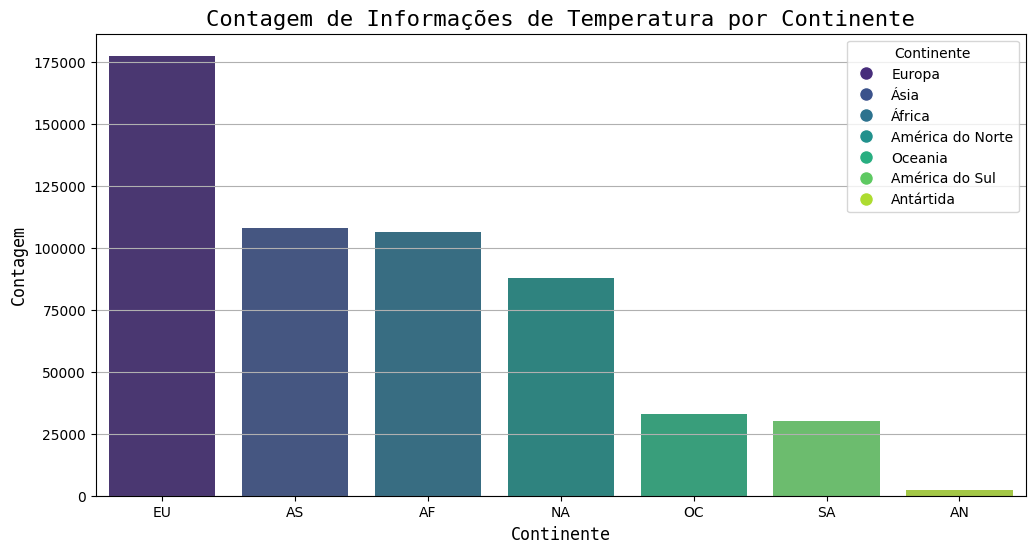

In [177]:
#Contagem de informações de temperatura por país
contagem_por_continente= temp_pais['continent'].value_counts()

#Criando um mapa de cores para cada barra
cores= sns.color_palette('viridis', len(contagem_por_continente))

#Mapeando as siglas para nomes de continentes
mapeamento_continentes= {'AS': 'Ásia', 'EU': 'Europa', 'AF': 'África', 'NA': 'América do Norte', 'SA': 'América do Sul', 'OC': 'Oceania', 'AN': 'Antártida'}

#Criando um gráfico de barras com cores distintas
plt.figure(figsize= (12, 6))
plt.grid(visible= None, which= 'major', axis= 'both')
grafico= sns.barplot(x= contagem_por_continente.index, y= contagem_por_continente, palette= cores)

#Estilizando o gráfico
plt.xlabel('Continente', fontsize= 12, family= 'monospace') #Adicionando legenda para o eixo x
plt.ylabel('Contagem', fontsize= 12, family= 'monospace') #Adicionando legenda para o eixo y
plt.title('Contagem de Informações de Temperatura por Continente', fontsize= 16, family= 'monospace', fontweight= 'roman') #Adicionando o título do gráfico

#Adicionando legenda para as cores
legenda_cores= [plt.Line2D([0], [0], marker= 'o', color= 'w', label= mapeamento_continentes[continente],
                            markerfacecolor= cor, markersize= 10) for continente, cor in zip(contagem_por_continente.index, cores)]
plt.legend(handles= legenda_cores, title= 'Continente', loc= 'upper right')

#Plotando o gráfico
plt.show()


Ao analisarmos o gráfico "Contagem de Informações de Temperatura por Continente", fica evidente que temos uma concentração dos dados de temperatura na região do continente europeu. Os continentes da Ásia e África apresentaram uma contagem balanceada de informações. Para o continente norte-americano, as informações contadas revelam-se um pouco mais da metade da contagem total para o continente europeu. Para os continentes da Oceania, América do Sul e Antartida, os dados somam menos de 50.000 linhas de informação de temperatura.

**2- Média Anual da Temperatura**

Os gráficos abaixo foram criados a fim de visualizar a tendência geral da temperatura ao longo dos anos nos dfs 'temp_pais' e 'temp_global'. Conclui-se que o uso de médias anuais facilitaria a identificação de padrões de longo prazo, portanto, foram calculadas as médias anuais para os atributos 'LandAndOceanAverageTemperature' e 'LandAverageTemperature' do df 'temp_global' e para o atributo 'AverageTemperature' do df 'temp_pais'

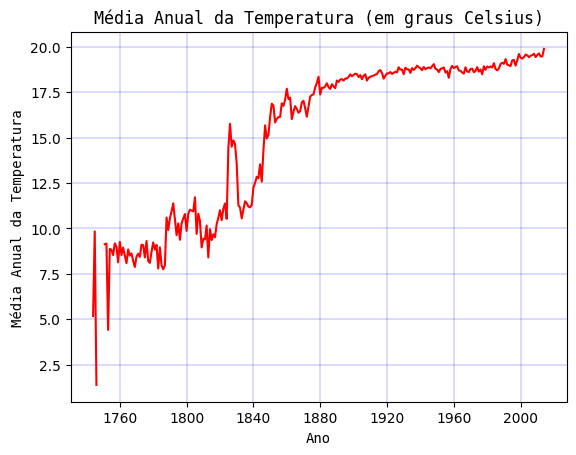

In [218]:
#Calculando a média Anual do df temp_pais
temp_pais_ano = temp_pais.resample('Y', on='dt').mean()

#Criando um gráfico de linhas onde o eixo x representa os anos e o eixo y representa a média anual da temperatura.
plt.plot(temp_pais_ano.index, temp_pais_ano['AverageTemperature'], color= 'red')
plt.grid(color= 'blue', linestyle= '-', linewidth= 0.2) #Exibindo as linhas de grade
plt.title('Média Anual da Temperatura (em graus Celsius)',  family= 'monospace') #Título do gráfico
plt.xlabel('Ano', family= 'monospace') #Legenda do eixo x
plt.ylabel('Média Anual da Temperatura', family= 'monospace')  #Legenda do eixo y
plt.show() #Plotado o gráfico

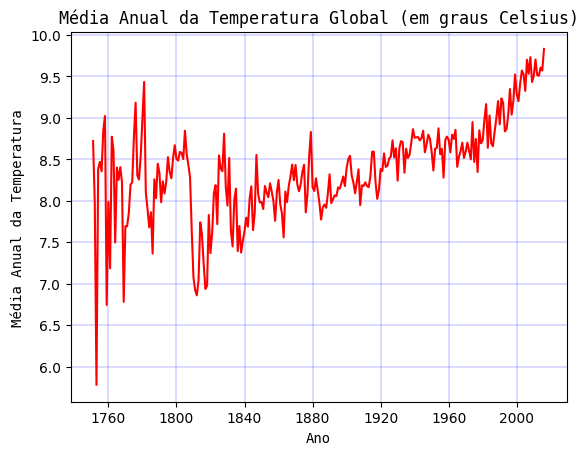

In [217]:
#Calculando a média Anual do df temp_pais
temp_ano = temp_global.resample('Y', on='dt').mean()

#Criando um gráfico de linhas onde o eixo x representa os anos e o eixo y representa a média anual de temperatura média global da terra
plt.plot(temp_ano.index, temp_ano['LandAverageTemperature'], color= 'red')
plt.grid(color= 'blue', linestyle= '-', linewidth= 0.2) #Exibindo as linhas de grade
plt.title('Média Anual da Temperatura Global (em graus Celsius)', family= 'monospace') #Título do Gráfico
plt.xlabel('Ano', family= 'monospace') #Legenda do eixo x
plt.ylabel('Média Anual da Temperatura', family= 'monospace') #Legenda do eixo y
plt.show() #Plotando o gráfico

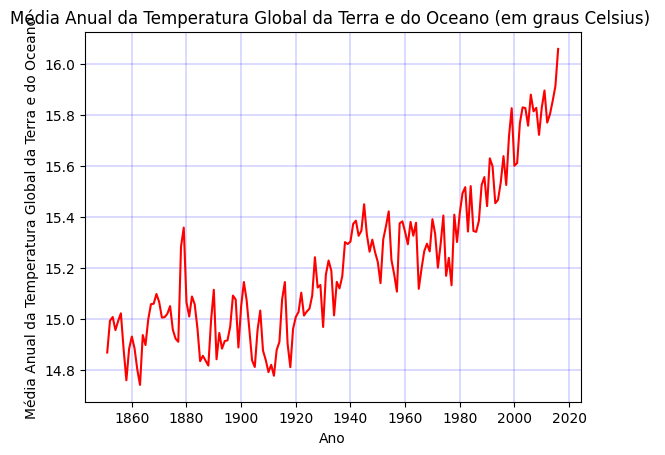

In [171]:
#Criando um gráfico de linhas onde o eixo x representa os anos e o eixo y representa a média anual de temperatura média global da terra e do oceano
plt.plot(temp_ano.index, temp_ano['LandAndOceanAverageTemperature'], color= 'red')
plt.grid(color= 'blue', linestyle= '-', linewidth= 0.2)
plt.title('Média Anual da Temperatura Global da Terra e do Oceano (em graus Celsius) ') #Título do Gráfico
plt.xlabel('Ano') #Legenda do eixo x
plt.ylabel('Média Anual da Temperatura Global da Terra e do Oceano') #Legenda do eixo y
plt.show() #Plotando o gráfico

Em uma primeira impressão dos três gráficos gerados, é possível notar um aumento gradativo nas médias anuais de temperatura. O primeiro gráfico, a respeito da Média Anual de Temperatura, calculado a partir do df "temp_pais" com a variável 'AverageTemperature', o intervalo de observação inicia-se no ano de 1743 e termina no ano de 2013. Ao observarmos a linha do gráfico que representa as médias anuais de temperatura, é possível notar que por volta dos anos 1800 e 1840, a média apresenta um pico de crescimento.
Os gráficos de 'Média Anual da Temperatua Global' e 'Média Anual da Temperatura Global da Terra e do Oceano' foram calculados a partir do df "temp_global" com as variáveis 'LandAverageTemperature' e 'LandAndOceanAverageTemperature', respectivamente. Nestes gráficos, o comportamento da média de temperatura é semelhante ao anterior, apesar da data de início ser no ano de 1850. Conclui-se então, que por volta dos anos de 1800 a média de temperatura global apresenta um pico e, a partir dos anos 1900, mantém-se o comportamento de elevação ao longo dos anos. É interessante notar que, as o pico de elevação de temperatura encontrado, bem como o período de crescimento das temperaturas, coincidem com o evento da Revolução Industrial, período da história humana que representa o aumento nas emissões de gases de efeito estufa, decorrentes da queima de carvão, petróleo e gás natural.

**3- Analise Sazonal da Temperatura**

Realizou-se uma análise para entender o comportamento das temperaturas médias ao longo das estações, com base na coluna 'Hemisfério', criada anteriormente. Para tanto, agrupou-se os dados em médias mensais, considerando a coluna 'Hemisfério', criando um novo df chamado 'data_M' com a média mensal de temperatura para cada hemisfério. Utilizou-se a função 'make_subplots' para incializar um conjunto de gráficos com 2 linhas e 2  colunas, cada um correspondendo a uma estação do ano (Primavera, Verão, Outono, Inverno). Com o loop for externo, percorreu-se as estações, com o loop interno, percorreu-se cada hemisfério, para cada estação definida. Utilizou-se a função '.loc' para filtrar os dados para o hemisfério específico. Por fim, a função 'fig.add_trace' foi utilizada para adicionar as linhas ao subplot para representar a média da temperatura ao longo do tempo para a estação atual e o hemisfério.

In [198]:
#Criando a coluna de estações do ano com base na coluna hemisfério
def estacao_do_ano(hemisferio, month):
    if (hemisferio == 'Norte' and month in [1, 2, 3]) or (hemisferio == 'Sul' and month in [12, 1, 2]):
        return 'Inverno'
    elif (hemisferio == 'Norte' and month in [4, 5, 6]) or (hemisferio == 'Sul' and month in [3, 4, 5]):
        return 'Primavera'
    elif (hemisferio == 'Norte' and month in [7, 8, 9]) or (hemisferio == 'Sul' and month in [6, 7, 8]):
        return 'Verão'
    elif (hemisferio == 'Norte' and month in [10, 11, 12]) or (hemisferio == 'Sul' and month in [9, 10, 11]):
        return 'Outono'
    else:
        return None

In [199]:
#Aplicando a função ao DataFrame
temp_pais['Estacao']= temp_pais.apply(lambda row: estacao_do_ano(row['Hemisfério'], row['month']), axis= 1)

In [201]:
#Visualizando o resultado
temp_pais.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,month,continent,Hemisfério,Estacao
0,1743-11-01,4.384,2.294,Åland,1743,11,EU,Norte,Outono
1,1744-04-01,1.530,4.680,Åland,1744,4,EU,Norte,Primavera
2,1744-05-01,6.702,1.789,Åland,1744,5,EU,Norte,Primavera
3,1744-06-01,11.609,1.577,Åland,1744,6,EU,Norte,Primavera
4,1744-07-01,15.342,1.410,Åland,1744,7,EU,Norte,Verão
5,1744-09-01,11.702,1.517,Åland,1744,9,EU,Norte,Verão
6,1744-10-01,5.477,1.862,Åland,1744,10,EU,Norte,Outono
7,1744-11-01,3.407,1.425,Åland,1744,11,EU,Norte,Outono
8,1744-12-01,-2.181,1.641,Åland,1744,12,EU,Norte,Outono
9,1745-01-01,-3.850,1.841,Åland,1745,1,EU,Norte,Inverno


Ao observarmos as primeiras linhas do df, constatou-se que a função para a criação da coluna de estação funcionou corretamente

In [204]:
#Reamostrando para médias mensais
data_M= temp_pais.groupby(['Hemisfério', 'Estacao', pd.Grouper(key= 'dt', freq= 'M')]).mean()

# Criando subplots
fig = make_subplots(rows= 2, cols= 2, subplot_titles= ['Primavera', 'Verão', 'Outono', 'Inverno'])

# Adicionando traces para cada estação em ambos os hemisférios
for estacao, row, col, months in [('Primavera', 1, 1, [3, 4, 5]),
                                  ('Verão', 1, 2, [6, 7, 8]),
                                  ('Outono', 2, 1, [9, 10, 11]),
                                  ('Inverno', 2, 2, [12, 1, 2])]:
    for hemisferio in ['Norte', 'Sul']:
        # Filtrando dados para o hemisfério e estação atual
        filtered_data= data_M.loc[(hemisferio, estacao)].reset_index()

        # Adicionando trace para a estação atual
        fig.add_trace(go.Scatter(
            x= filtered_data['dt'],
            y= filtered_data['AverageTemperature'],
            name= f'{estacao} ({hemisferio} Hemisphere)',
        ), row= row, col= col)

# Atualizando o layout
fig.update_layout(title_text= 'Médias de Temperatura- Análise Sazonal (em graus Celsius)')
fig.show()


Ao analisarmos os gráficos, podemos entender um pouco melhor como o aumento das temperaturas visualizados anteriormente, influenciam as estações do ano. Com relação a primavera nos hemisférios Norte e Sul, é possível notar que ambas demonstram uma tendência de aumento de temperatura. Todavia, o hemisfério Norte aparenta ter sofrido um maior aumento de temperatura nessa época do ano. Já o verão, aparenta revelar uma tendência de crescimeto nas médias de temperatura para o Hemisfério Norte e uma tendência de baixa para o Hemisfério Sul. Quanto ao outono, as médias mantém-se estáveis para o Hemisfério Sul e, apresentam tendência de crescimento para o Hemisfério Norte. Já os invernos, em ambos hemisférios, estão mais quentes e as temperaturas médias revelam a tendência de crescimento.
É interessante notar, novamente, como os valores apresentam algum tipo de anomalia em seu comportamento (aumento ou descréscimo) entre os anos de 1800 e 1850, o que reforça novamente a conclusão de que as atividades humanas que iniciaram-se nessa época, tiveram efeitos na temperatura do planeta.

**4- Média Mensal e Anual da temperatura para cada continente ao longo dos meses**

Criou-se um gráfico para visualizar a média da temperatura ao longo dos meses, para cada continente. Para tanto, utilizou-se o método 'sorted(set' para obter a lista única dos continentes presentes nos dados e, em seguida, criar um dicionário de cores usando o esquema 'Set2' do Seaborn, com o número de cores sendo o mesmo que o número de continentes. Criou-se subplots com 2 linhas e 4 colunas em uma única figura, compartilhando os eixos x e y para plotar as informações da média. Por fim, definiu-se um 'for' para iterar sobre os continentes, filtrando-os, calculando a média mensal para cada um deles e adicionando os títulos, rótulos e legendas. O mesmo procedimento foi realizado para visualizar a média anual. As diferenças entre os códigos criados estão comentadas nas células dos códigos.

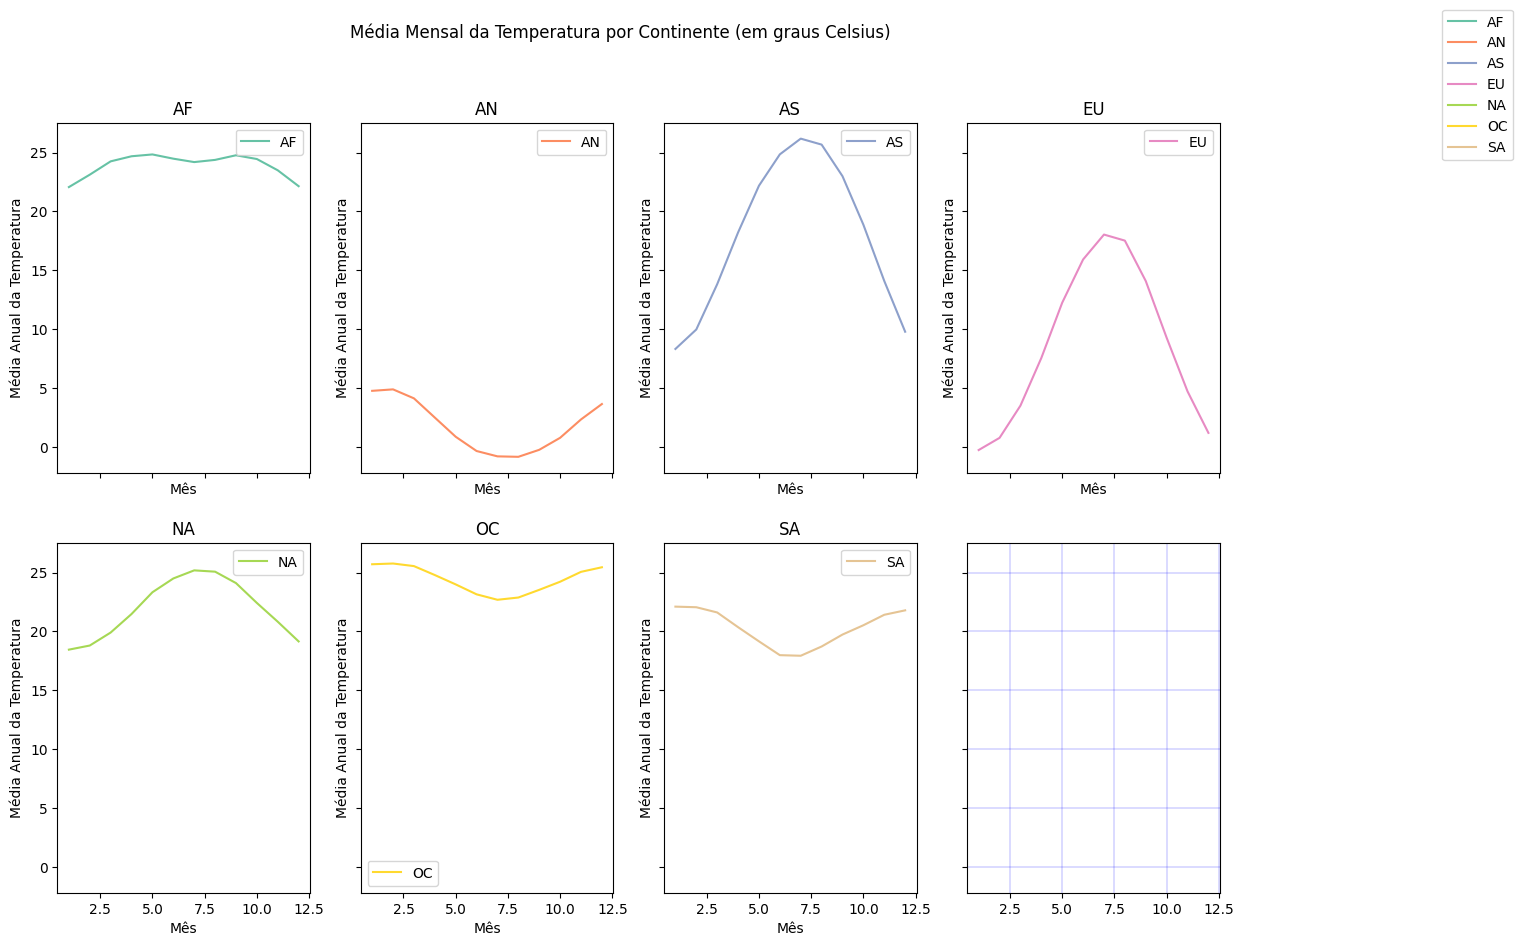

In [180]:
#Definindo as cores por continente
continentes= sorted(set(temp_pais["continent"])) #Obtendo a lista única dos continentes
dictCoresContinentes= dict(zip(continentes, sns.color_palette("Set2", n_colors= len(continentes)))) #criando um dicionário de cores unicas para cada continente

#Plotando a média anual da temperatura para cada continente
fig, axs= plt.subplots(nrows= 2, ncols= 4, figsize= (15, 10), sharex= True, sharey= True)
plt.grid(color= 'blue', linestyle= '-', linewidth= 0.2) #Exibindo as linhas de grade

for i, continente in enumerate(continentes):
    row= i // 4
    col= i % 4

    dados_continente= temp_pais[temp_pais["continent"] == continente] #Filtrando os dados
    media_temp_por_mes= dados_continente.groupby('month')['AverageTemperature'].mean() #Calculando a média mensal da temp. para cada continente

    axs[row, col].plot(media_temp_por_mes.index, media_temp_por_mes.values, color= dictCoresContinentes[continente], label= continente) #Plotando a média mensal
    axs[row, col].set_title(continente) #Título
    axs[row, col].set_xlabel('Mês') #Legenda eixo x
    axs[row, col].set_ylabel('Média Anual da Temperatura') #Legenda eixo y
    axs[row, col].legend() #Legenda

#Adicionando legenda fora do gráfico
fig.legend(loc= 'upper right', bbox_to_anchor= (1.1, 1))

#Adicionando um título pra figura
fig.suptitle('Média Mensal da Temperatura por Continente (em graus Celsius)')

#Exibindo o gráfico
plt.show()


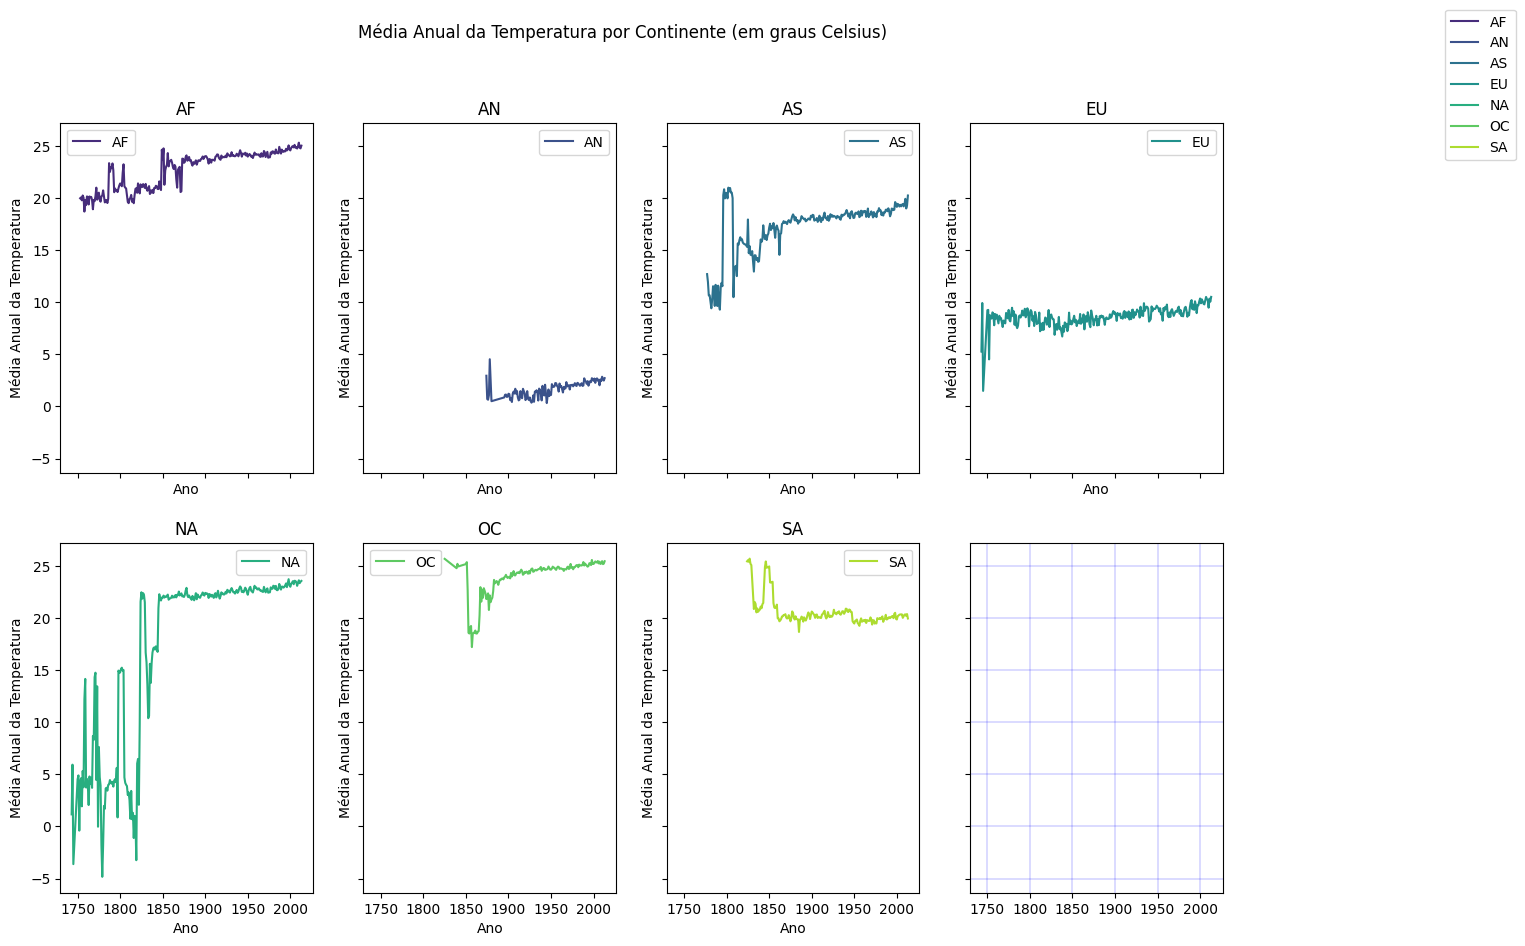

In [181]:
#Definindo as cores por continente
continentes= sorted(set(temp_pais["continent"]))
dictCoresContinentes= dict(zip(continentes, sns.color_palette("viridis", n_colors=len(continentes))))

#Plotando a média anual da temperatura para cada continente
fig, axs= plt.subplots(nrows= 2, ncols= 4, figsize= (15, 10), sharex= True, sharey= True)
plt.grid(color= 'blue', linestyle= '-', linewidth= 0.2) #Exibindo as linhas de grade

for i, continente in enumerate(continentes):
    row = i // 4
    col = i % 4

    dados_continente= temp_pais[temp_pais["continent"] == continente] #Filtrando os dados
    media_temp_por_mes= dados_continente.groupby('year')['AverageTemperature'].mean() #Calculando a média anual da temp. para cada continente

    axs[row, col].plot(media_temp_por_mes.index, media_temp_por_mes.values, color= dictCoresContinentes[continente], label= continente) #Plotando a média anual
    axs[row, col].set_title(continente)  #Título
    axs[row, col].set_xlabel('Ano') #Legenda eixo x
    axs[row, col].set_ylabel('Média Anual da Temperatura') #Legenda eixo y
    axs[row, col].legend() #Legenda

#Adicionando legenda fora do gráfico
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

#Adicionando um título à figura (superior a todos os gráficos)
fig.suptitle('Média Anual da Temperatura por Continente (em graus Celsius)')

#Exibindo o gráfico
plt.show()


Ao analisarmos o gráfico 'Média Mensal da Temperatura por Continente', podemos entender um pouco como a média de temperatura comporta-se ao longo do ano nos continentes. No continente da América do Sul (SA), por exemplo, o resultado coincide com o esperado; tendo elevação da média nos primeiros e ultimos meses do ano, que correspondem ao período da estação do Verão ou transição da mesma, enquanto que a baixa na média é apresentada durante os meses que representam o meio do ano, ou seja, quando é Inverno na região. O mesmo padrão é observado para os continentes do Hemisfério Sul. Já os continentes do Hemisfério Norte, apresentam baixas de média de temperatura nos períodos de fim e início do ano (inverno no Hemisfério Norte), e aumento nas médias no período médio do ano (verão no Hemisfério Norte).

Ao analisarmos o gráfico 'Média Anual da Temperatura por Continente (em graus Celsius)', a primeira coisa que podemos notar é a discrepância no intervalo de informações entre os continentes. Como visualizado no primeiro gráfico desse notebook, os dados para os continentes europeu, asiático, norte-americano e africano apresentavam uma contagem maior de informações. Isso é revelado nos 'gaps' (espaços em branco) nos gráficos para a América do Sul e Antartida.
Novamente, todos os gráficos demonstram uma anomalia na média por volta dos anos de 1800 e 1850, com exceção do continente europeu e da Antartida. Os gráficos também demonstram, novamente, a tendência de aumento na média da temperatura.


**5- Comparação entre AverageTemperature e LandAverageTemperature**

Para uma análise comparativa das informações de temperatura disponíveis nos dfs 'temp_pais' e 'temp_global', criou-se um novo df, mesclando as colunas de interesse de cada df mencionado. Para tanto, criou-se uma lista das variáveis de interesse 'cols', presentes no df 'temp_global', criando um novo df a partir da lista de colunas selecionadas. Para mesclar os dfs, utilizou-se a função 'pd.merge', nos dfs 'temp_pais' e 'teste', utilizando as colunas 'dt' como chave de fusão. Dessa forma, originou-se um df 'merge' com as linhas de ambos dfs envolvidos na fusão, onde tais linhas foram combinadas com base nos valores da coluna 'dt', ou seja, com base nos valores de data apresentados nos dados.

In [187]:
#Selecionando as colunas desejadas
cols= ['dt', 'LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature', 'LandAndOceanAverageTemperature']

#Criando um novo DataFrame com as colunas selecionadas
teste= temp_global.loc[:, cols]

In [189]:
#Visualizando o df criado
teste

,dt,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
0,1750-01-01,3.034,NaN,NaN,NaN
1,1750-02-01,3.083,NaN,NaN,NaN
2,1750-03-01,5.626,NaN,NaN,NaN
3,1750-04-01,8.490,NaN,NaN,NaN
4,1750-05-01,11.573,NaN,NaN,NaN
...,...,...,...,...,...
3187,2015-08-01,14.755,20.699,9.005,17.589
3188,2015-09-01,12.999,18.845,7.199,17.049
3189,2015-10-01,10.801,16.450,5.232,16.290
3190,2015-11-01,7.433,12.892,2.157,15.252


In [190]:
#Criando um df com a combinação do df 'temp_pais' e 'teste', utilizando as colunas 'dt' como chave de fusão
merge= pd.merge(temp_pais, teste,  left_on='dt', right_on='dt')

In [191]:
#Verificando as colunas após a fusão
merge.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country',
       'year', 'month', 'continent', 'Hemisfério', 'LandAverageTemperature',
       'LandMaxTemperature', 'LandMinTemperature',
       'LandAndOceanAverageTemperature'],
      dtype='object')

In [192]:
#Visualizando o df gerado
merge

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,month,continent,Hemisfério,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
0,1750-01-01,1.091,1.119,Åland,1750,1,EU,Norte,3.034,NaN,NaN,NaN
1,1750-01-01,3.600,2.112,Albania,1750,1,EU,Norte,3.034,NaN,NaN,NaN
2,1750-01-01,3.313,1.997,Andorra,1750,1,EU,Norte,3.034,NaN,NaN,NaN
3,1750-01-01,-3.582,1.807,Austria,1750,1,EU,Norte,3.034,NaN,NaN,NaN
4,1750-01-01,-4.102,2.546,Belarus,1750,1,EU,Norte,3.034,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
544106,2013-09-01,28.048,0.974,Puerto Rico,2013,9,NA,Norte,13.154,18.947,7.482,16.894
544107,2013-09-01,13.745,2.099,Saint Pierre And Miquelon,2013,9,NA,Norte,13.154,18.947,7.482,16.894
544108,2013-09-01,29.770,1.005,Turks And Caicas Islands,2013,9,NA,Norte,13.154,18.947,7.482,16.894
544109,2013-09-01,18.273,1.210,United States,2013,9,NA,Norte,13.154,18.947,7.482,16.894


Importante salientar que as informações das colunas 'country', 'continent' e 'hemisfério' são apenas relacionadas aos dados do df 'temp_pais' e não refletem essas informações aos outros dados do df 'teste'. Dessa forma, essas informações poderiam ser utilizadas a título de comparação entre as temperaturas médias para esses atributos e as médias globais presentes no df 'teste'. Para a análise pretendida neste notebook, somente a coluna de continente será utilizada. Dessa forma, as mesmas foram removidas, tendo em vista que apenas queremos comparar os atributos 'AverageTemperature','AverageTemperatureUncertainty', 'LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature' e 'LandAndOceanAverageTemperature'.

In [193]:
#Listando as colunas que seram mantidas
cols_mantidas= ['dt', 'continent', 'AverageTemperature', 'AverageTemperatureUncertainty','LandAverageTemperature', 'year', 'month',
       'LandMaxTemperature', 'LandMinTemperature',
       'LandAndOceanAverageTemperature']

In [194]:
#Criando um novo df apenas com as colunas selecionadas
temp_merge= merge[cols_mantidas]

In [202]:
#Visualizando o resultado
temp_merge

,dt,continent,AverageTemperature,AverageTemperatureUncertainty,LandAverageTemperature,year,month,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
0,1750-01-01,EU,1.091,1.119,3.034,1750,1,NaN,NaN,NaN
1,1750-01-01,EU,3.600,2.112,3.034,1750,1,NaN,NaN,NaN
2,1750-01-01,EU,3.313,1.997,3.034,1750,1,NaN,NaN,NaN
3,1750-01-01,EU,-3.582,1.807,3.034,1750,1,NaN,NaN,NaN
4,1750-01-01,EU,-4.102,2.546,3.034,1750,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
544106,2013-09-01,NA,28.048,0.974,13.154,2013,9,18.947,7.482,16.894
544107,2013-09-01,NA,13.745,2.099,13.154,2013,9,18.947,7.482,16.894
544108,2013-09-01,NA,29.770,1.005,13.154,2013,9,18.947,7.482,16.894
544109,2013-09-01,NA,18.273,1.210,13.154,2013,9,18.947,7.482,16.894


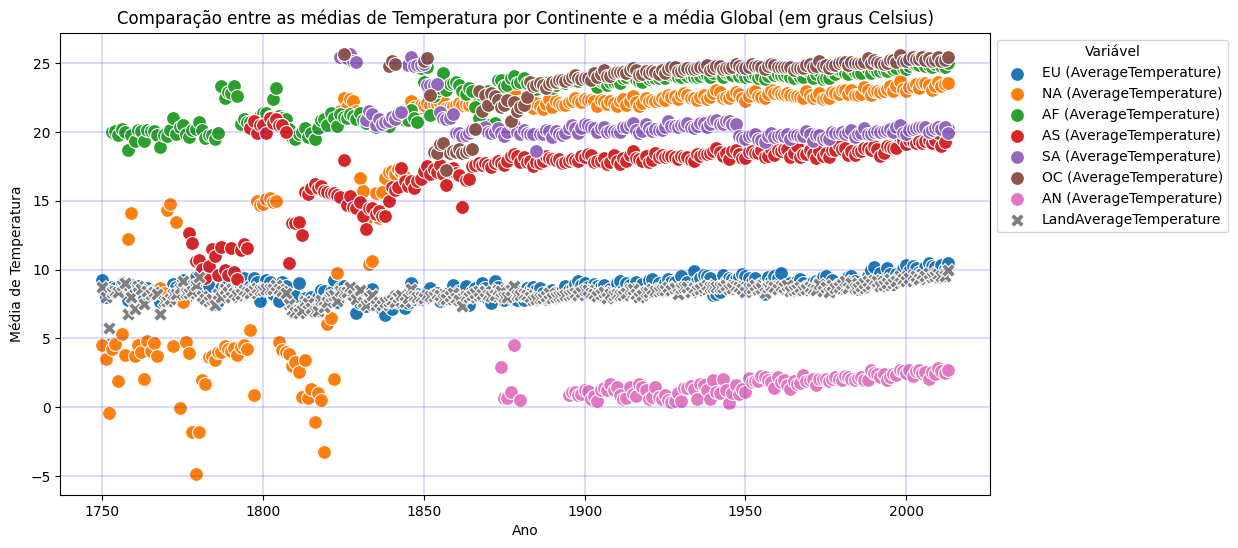

In [197]:
#Calculando as médias por ano e continente para AverageTemperature e por ano para  LandAverageTemperature
media_ano_continente= temp_merge.groupby(['year', 'continent'])['AverageTemperature'].mean().reset_index()
media_global= temp_merge.groupby(['year'])['LandAverageTemperature'].mean().reset_index()

#Criando a figura do gráfico
plt.figure(figsize= (12, 6))
plt.grid(color= 'blue', linestyle= '-', linewidth= 0.2) #Exibindo as linhas de grade

#Gráfico para cada continente - AverageTemperature
for continent in media_ano_continente['continent'].unique():
    data_continent = media_ano_continente[media_ano_continente['continent'] == continent]
    sns.scatterplot(data= data_continent, x= 'year', y= 'AverageTemperature', s= 100, label= f'{continent} (AverageTemperature)')

#Gráfico para LandAverageTemperature
sns.scatterplot(data= media_global, x= 'year', y= 'LandAverageTemperature', marker= 'X', s= 100, label= 'LandAverageTemperature')

plt.title('Comparação entre as médias de Temperatura por Continente e a média Global (em graus Celsius)') #Título
plt.xlabel('Ano') #Legenda do eixo x
plt.ylabel('Média de Temperatura') #Legenda do eixo y
plt.legend(title= 'Variável', loc= 'upper left', bbox_to_anchor= (1, 1)) #Legenda
plt.show() #Plotando o gráfico


Ao analisarmos o gráfico 'colocar o nome', podemos notar que os valores de média de temperatura anuais para o continente norte-americano mantém-se abaixo da média global anual, no período que antecede o século XIX e passa a aumentar após o início do século XIX. Os continentes africano, sul-americano, asiático e da oceania mantiveram suas médias anuais acima das médias calculadas para todo globo. O continente da Antartida manteve suas médias abaixo das médias globais, o que também era esperado. Por fim, foi possível notar que as médias de temperatura do continente europeu mantiveram-se próximas das médis globais. Além disso, é possível notar uma tendência de crescimento em todas as médias ao longo dos anos.

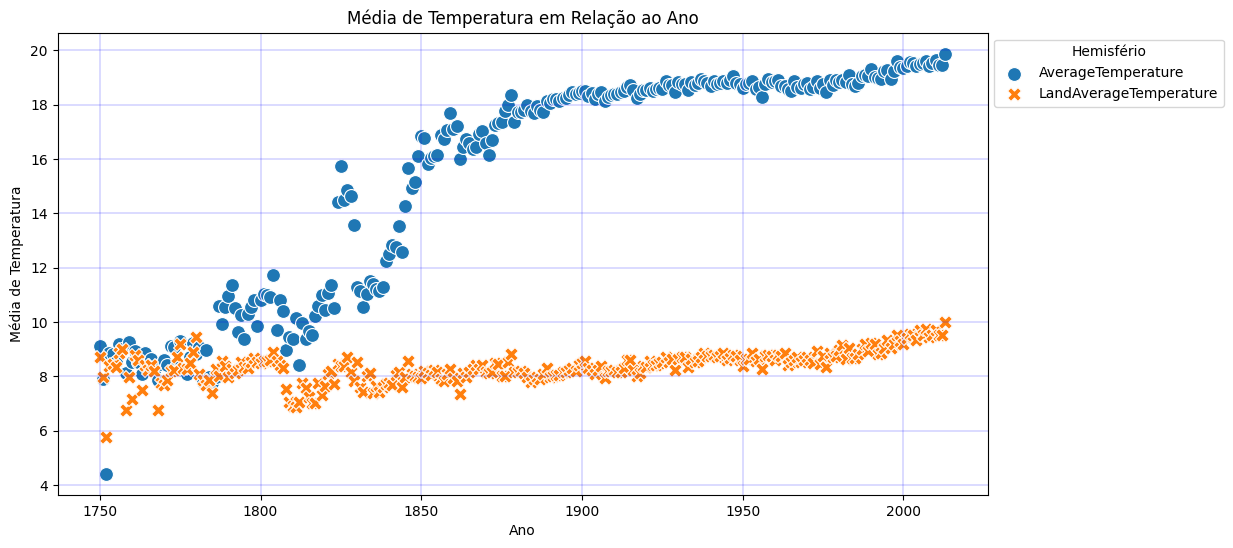

In [203]:
#Calculando as médias por ano
media_ano= temp_merge.groupby(['year'])[['AverageTemperature', 'LandAverageTemperature']].mean().reset_index()

#Criando a figura do gráfico
plt.figure(figsize= (12, 6))
plt.grid(color= 'blue', linewidth= 0.2)

#Criando os gráficos para  AverageTemperature e LandAverageTemperature
sns.scatterplot(data= media_ano, x= 'year', y= 'AverageTemperature', s= 100, label= 'AverageTemperature')
sns.scatterplot(data= media_ano, x= 'year', y= 'LandAverageTemperature', marker= 'X', s= 100, label= 'LandAverageTemperature')

plt.title('Média de Temperatura em Relação ao Ano') #Título
plt.xlabel('Ano') #Legenda eixo x
plt.ylabel('Média de Temperatura') #Legenda eixo y
plt.legend(title= 'Hemisfério', loc= 'upper left', bbox_to_anchor= (1, 1)) #Legenda eixo
plt.show() #Plotando o gráfico

Quando comparamos a média anual das temperaturas disponíveis no df 'temp_pais' com a media anual das temperaturas globais disponíveis no df 'temp_global', podemos notar que o comportamento ao longo dos anos é semelhante, ambas demonstrando uma anomalia no período de 1800 a 1850, com tendência de aumento a partir do período de 1850.

**6- Tendências e padrões de temperatura ao longo das décadas**

Para facilitar a compreensão e análise das diferentes variáveis de temperatura disponíveis, criou-se boxplots para visualizar como o comportamento das variáveis mudam ao longo das décadas.
Para tanto, criou-se uma nova coluna em 'temp_merge', chamada 'Decade', onde os anos foram agrupados em décadas. Isso foi feito dividindo o ano por 10, arredondando para baixo e multiplicando por 10. Criou-se a lista 'variaveis_boxplot' para definir as variáveis para as quais o boxplots seriam gerados. Criou-se uma figura com subplots, onde o número de colunas tratava-se de metade do comprimento da lista de variáveis (arredondado para baixo).

<ipython-input-66-0a332aa17e61>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



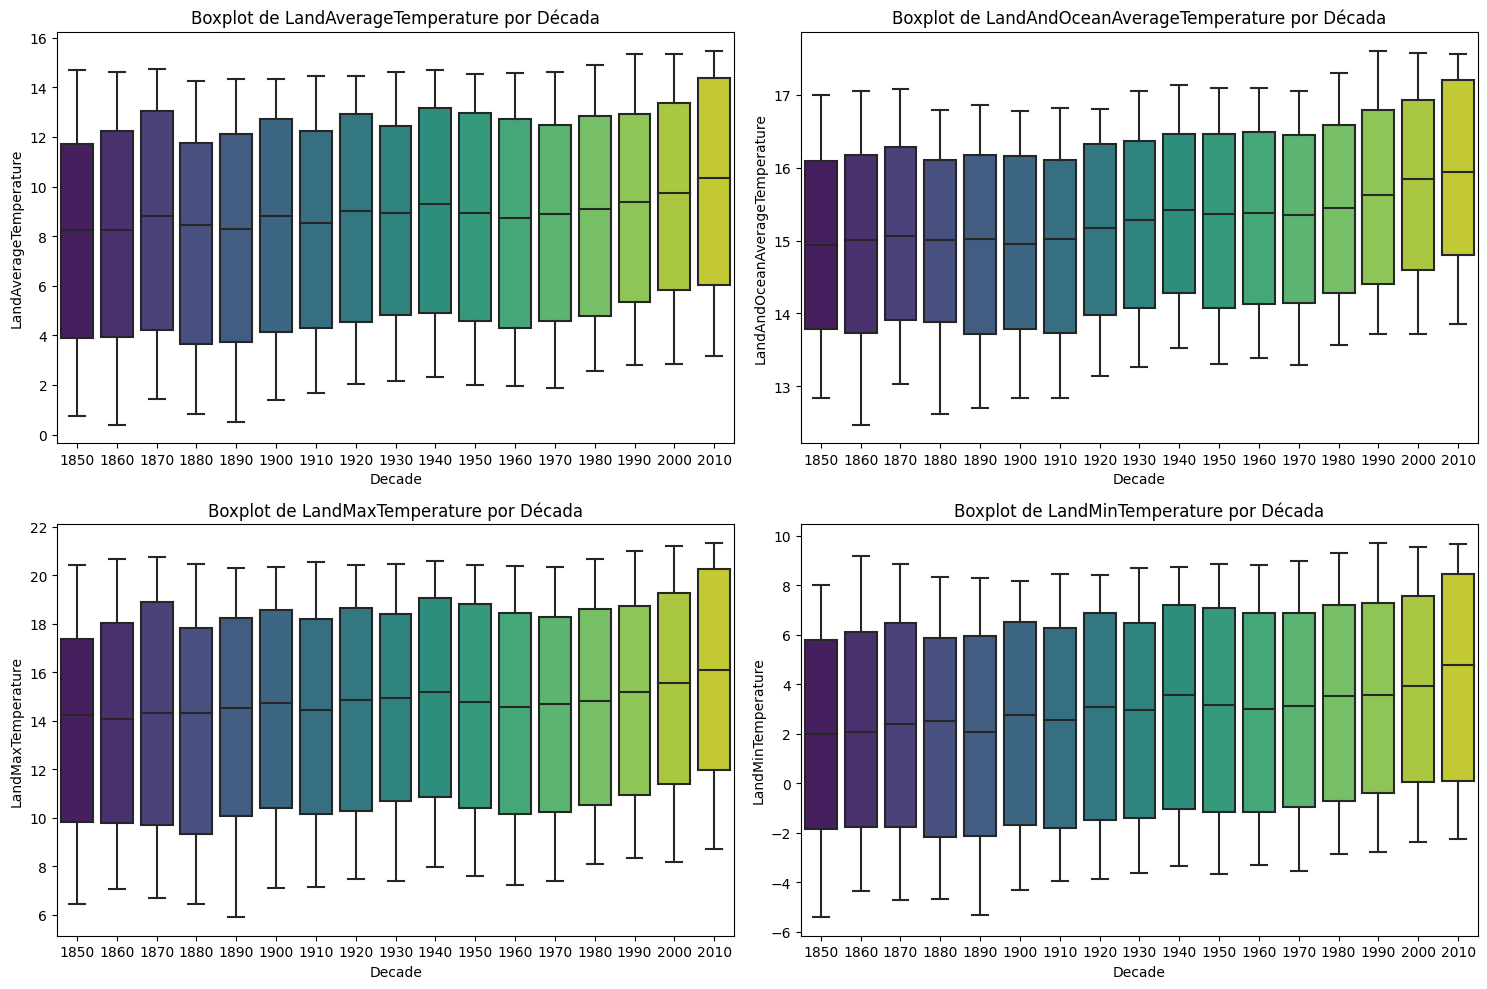

In [66]:
#Adicionando uma coluna para o intervalo de 10 anos
temp_merge['Decade']= (temp_merge['Year'] // 10) * 10

#Especificando as variáveis para as quais serão criados os boxplots
variaveis_boxplot = ['LandAverageTemperature', 'LandAndOceanAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature']

#Criando uma figura com subplots
fig, axs= plt.subplots(nrows= 2, ncols= len(variaveis_boxplot)//2, figsize= (15, 10))

#Loop para criar boxplots para cada variável
for i, variavel in enumerate(variaveis_boxplot):
    sns.boxplot(x= 'Decade', y= variavel, data= temp_merge, palette= 'viridis', ax= axs[i//2, i%2]) #Boxplot para cada variável ao longo das décadas
    axs[i//2, i%2].set_title(f'Boxplot de {variavel} por Década') #Título do subplot

#Ajustando o layout da figura
plt.tight_layout()
plt.show()


Ao analisarmos os boxplots gerados para as variáveis 'LandAverageTemperature' e 'LandAndOceanAverageTemperature', podemos perceber que a mediana e os valores mínimos ao longo dos anos apresentam uma tendência de aumento em seus valores. O mesmo comportamento é notado nas variáveis 'LandMaxTemperature', 'LandMinTemperature'. Nota-se, também, que não há presença de outliers nos dados.

**7- Tendência das variáveis de Mínimos e Máximos da Temperatura**

Para visualizar o comportamento das variáveis que possuem informações dos valores máximos e mínimos de temperatura global, criou-se um gráfico de linhas com intervalos de confiança, definidos pelo desvio padrão, ao longo dos anos.

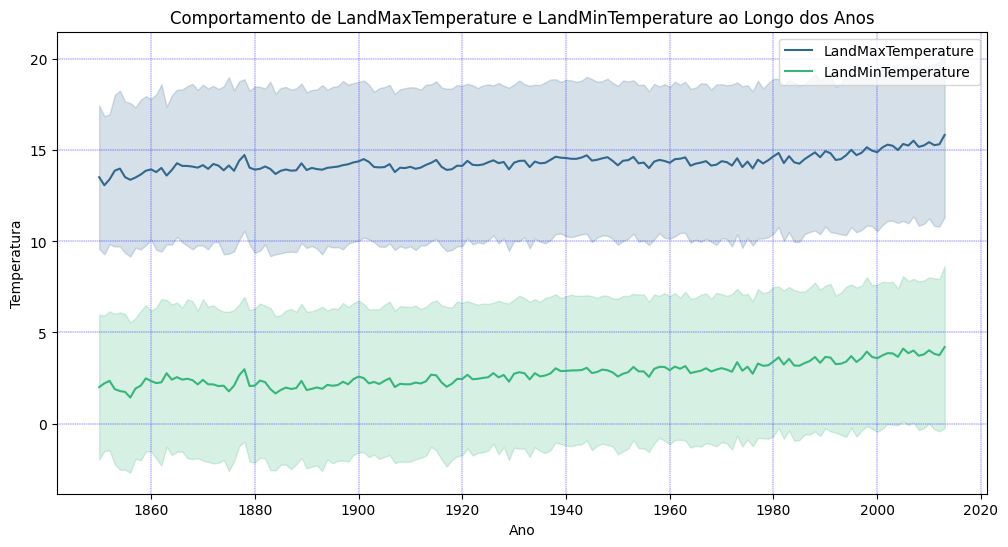

In [207]:
#Definindo as cores para os intervalos de confiança
colors= sns.color_palette('viridis', n_colors= 2)

#Criando a figura e eixos
plt.figure(figsize=(12, 6))
plt.grid(color= 'blue', linestyle= '--', linewidth= 0.3)

#Gráfico de linha com intervalo de confiança para LandMaxTemperature
#O parâmetro 'errobar' define o intervalo de confiança. Neste caso, é representado pelo desvio padrão 'sd'
sns.lineplot(x= 'year', y= 'LandMaxTemperature', data= temp_merge, errorbar= 'sd', color= colors[0], label= 'LandMaxTemperature')

#Gráfico de linha com intervalo de confiança para LandMinTemperature
#O parâmetro 'errobar' define o intervalo de confiança. Neste caso, é representado pelo desvio padrão 'sd'
sns.lineplot(x= 'year', y= 'LandMinTemperature', data= temp_merge, errorbar= 'sd', color= colors[1], label= 'LandMinTemperature')
plt.title('Comportamento de LandMaxTemperature e LandMinTemperature ao Longo dos Anos') #Título
plt.xlabel('Ano') #Legenda do eixo x
plt.ylabel('Temperatura') #Legenda do eixo y

# Adiciona legenda
plt.legend()

# Exibe o gráfico
plt.show()


Ao analisarmos o gráfico que demonstra os comportamento das temperaturas mínimas e máximas do globo ao longo dos anos, podemos notar, novamente, que os valores apresentam uma tendência de crescimento ao longo dos anos, com um aumento de cerca de 2°C entre os anos de 1860 e 2020.

**8- Correlação entre as variáveis**

Com o objetivo explorar a correlação entre as variáveis presentes no df 'temp_merge', utilizou-se o método de correlação de Pearson. A correlação de Pearson é uma medida estatística que avalia a relação linear entre duas variáveis contínuas, atribuindo um valor na faixa de -1 a 1. Dessa forma, quanto mais próxima de 1, trata-se de uma correlação positiva forte, indicando que as duas variáveis têm uma relação linear positiva forte. Isso significa que, à medida que uma variável aumenta, a outra também tende a aumentar, e vice-versa. Quando mais próxima de -1, trata-se de uma correlação negativa forte, podendo indicar que as duas variáveis têm uma relação linear negativa forte. Isso significa que, à medida que uma variável aumenta, a outra tende a diminuir, e vice-versa. Por fim, para os valores próximos de 0, a correlação é fraca ou inexistente, ou seja, não há uma relação linear (positiva ou negativa) forte entre as variáveis.

Para visualizar a correlação, criou-se um heatmap utilizando a biblioteca 'seaborn', onde as células que estivessem mais claras indicassem correlações mais fortes.


In [208]:
#descobrindo se existe correlação entre as variáveis utilizando o método de pearson
merge_corr= merge.corr(method= "pearson")
merge_corr

,AverageTemperature,AverageTemperatureUncertainty,year,month,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
AverageTemperature,1.000000,-0.304448,0.235055,0.087276,0.356963,0.305231,0.305421,0.306045
AverageTemperatureUncertainty,-0.304448,1.000000,-0.738416,-0.029829,-0.120397,-0.130245,-0.155028,-0.184991
year,0.235055,-0.738416,1.000000,-0.002369,0.088422,0.079579,0.129537,0.195207
month,0.087276,-0.029829,-0.002369,1.000000,0.257694,0.247555,0.288398,0.209684
LandAverageTemperature,0.356963,-0.120397,0.088422,0.257694,1.000000,0.996395,0.996033,0.988514
LandMaxTemperature,0.305231,-0.130245,0.079579,0.247555,0.996395,1.000000,0.993624,0.984843
LandMinTemperature,0.305421,-0.155028,0.129537,0.288398,0.996033,0.993624,1.000000,0.987173
LandAndOceanAverageTemperature,0.306045,-0.184991,0.195207,0.209684,0.988514,0.984843,0.987173,1.000000


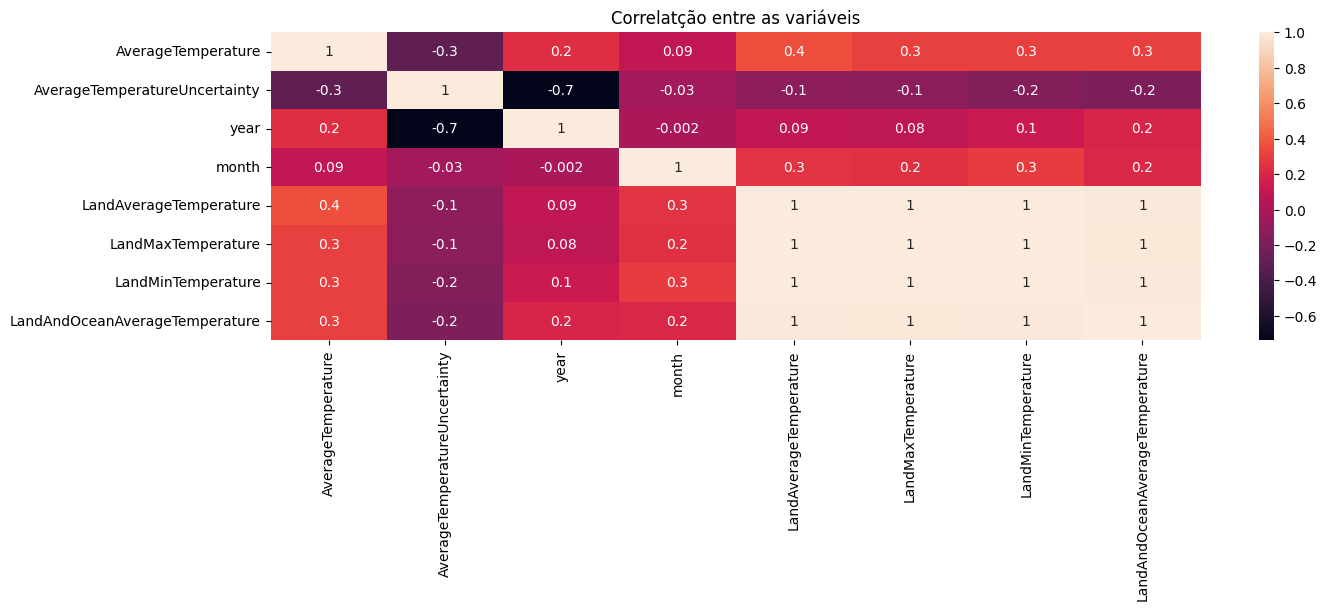

In [209]:
#plotando a tabela de visualização da correlação
plt.figure(figsize= (15,4))
sns.heatmap(merge_corr, annot= True, fmt= ".1g")
plt.title("Correlatção entre as variáveis")
plt.show()

Ao analisarmos as correlações de Pearson calculadas para as variáveis podemos concluir que, a variável ‘AverageTemperature’ tem forte correlação positiva com ‘LandAverageTemperature’, ‘LandMaxTemperature’, e ‘LandMinTemperature’ (correlações em torno de 0.3 a 0.31). Isso era esperado, pois todas essas variáveis estão relacionadas às temperaturas médias. Além disso, a variável  ‘AverageTemperature’ também tem correlação positiva com ‘LandAndOceanAverageTemperature’, embora um pouco menos forte.
Apesar de não ser necessária a análise dessas variáveis, ‘year’ e ‘Decade’ têm uma correlação muito forte (próxima a 1), o que também era esperado, pois Decade é derivada de Year. A correlação positiva indica que, conforme o ano aumenta, a década também aumenta.
A variável ‘AverageTemperatureUncertainty’ tem correlação negativa com várias variáveis e, com relação às variáveis ‘year’ e ‘decade’, apresentou uma correlação negativa forte, ou seja, a incerteza na temperatura média tende a diminuir com o aumento de Year e Decade. Isso pode sugerir uma melhoria na precisão ou métodos de medição ao longo do tempo.
Por fim, a variável ‘month’ não tem uma correlação forte com outras variáveis, o que também era esperado, pois trata-se de uma variável categórica representando o mês.


#**Pré-processamento**
----


O pré-processamento de dados é uma etapa fundamental em análises de séries temporais, especialmente ao aplicar modelos ARIMA (AutoRegressive Integrated Moving Average). Essa fase envolve a manipulação e transformação dos dados brutos antes de serem introduzidos em modelos de séries temporais. A importância do pré-processamento reside em melhorar a qualidade dos dados e torná-los mais adequados para a aplicação de técnicas de modelagem.

Algumas etapas comuns de pré-processamento em séries temporais para modelos ARIMA incluem o tratamento de valores ausentes, transformação de dados para estabilizar a variância, verificação de estacionaridade, remoção de outliers, normalização e padronização, e seleção de parâmetros.

A normalização ou padronização de séries temporais, especialmente quando trata-se de dados de temperatura, pode não ser apropriada. Em séries temporais que representam fenômenos naturais, como temperatura, a interpretação dos dados em sua escala original é muitas vezes mais significativa. Normalizar ou padronizar implica em ajustar os valores para uma escala padrão, entre 0 e 1 ou com média zero e desvio padrão um. Isso pode ser útil em muitos tipos de dados, especialmente quando diferentes unidades ou ordens de magnitude estão presentes. No entanto, para dados de temperatura, essa transformação pode perder a interpretação intuitiva dos valores.

Dessa forma, optou-se por não utilizar métodos de transformações numéricas como a normalização ou padronização dos dados.

Em análise de séries temporais, é crucial que os dados estejam organizados de maneira que a dimensão temporal seja clara e possa ser adequadamente interpretada. Dessa forma, os dados doram indexados pela coluna de datas, com o intuito de garantir que a estrutura temporal da série fosse preservada, permitindo a ordenação temporal dos dados e facilitando a aplicação de métodos como o modelo ARIMA.
Dessa forma, utilizou-se a função '.set_index()' especificando a coluna 'dt', para transformá-la em índice do df temp_merge.

In [210]:
#Verificando as informações da coluna 'dt'
temp_merge['dt'].info()

<class 'pandas.core.series.Series'>
Int64Index: 544111 entries, 0 to 544110
Series name: dt
Non-Null Count   Dtype         
--------------   -----         
544111 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.3 MB


In [211]:
#Transformando a coluna 'dt' no index do df temp_merge
temp_merge= temp_merge.set_index('dt')

Como parte do pré-processamento, vamos verificar as variáveis possuem linhas com valores nulos utilizando o método '.isna()' para a verificação de valores nulos e a função '.sum()' para somar os valores nulos presentes no df.

In [212]:
#Verificando a contagem de valores ausentes para cada coluna
temp_merge.isna().sum()

continent                             0
AverageTemperature                    0
AverageTemperatureUncertainty         0
LandAverageTemperature                0
year                                  0
month                                 0
LandMaxTemperature                91653
LandMinTemperature                91653
LandAndOceanAverageTemperature    91653
dtype: int64

O método ADF (Augmented Dickey-Fuller) é uma técnica estatística utilizada para testar a presença de raiz unitária em uma série temporal. A presença de raiz unitária em uma série temporal pode indicar que a série não é estacionária, o que é uma condição importante para o modelo ARIMA. A estacionariedade é desejável em muitos contextos de modelagem de séries temporais, pois muitos métodos e algoritmos assumem que as propriedades estatísticas da série permanecem constantes ao longo do tempo


Para verificar se trata-se de uma série estacionária, tentou-se utilizar o método do teste ADF, entretanto, não foi possível executar o código sem que o notebook no google colab fosse desligado. Dessa forma, após alguns testes, optou-se por uma abordagem onde dividiu-se os dados em uma pequena amostra (20%) dos dados, a fim de executar o teste ADF com a memória disponível no GoogleColab.

In [213]:
#Extraindo a coluna 'AverageTemperature'
serie= temp_merge['LandAverageTemperature']

In [214]:
serie

dt
1750-01-01     3.034
1750-01-01     3.034
1750-01-01     3.034
1750-01-01     3.034
1750-01-01     3.034
               ...  
2013-09-01    13.154
2013-09-01    13.154
2013-09-01    13.154
2013-09-01    13.154
2013-09-01    13.154
Name: LandAverageTemperature, Length: 544111, dtype: float64

In [215]:
#Criando uma amostra com 20% dos dados
amostra= serie.sample(frac= 0.2, random_state= 42)

#Aplicando o teste ADF
resultado_adf= adfuller(amostra)

#Exibindo os resultados do teste
print('Estatística ADF:', resultado_adf[0])
print('Valor-p:', resultado_adf[1])
print('Valores Críticos:', resultado_adf[4])

#Interpretando os resultados
if resultado_adf[1] <= 0.05:
    print('Rejeita a hipótese nula; a série é estacionária.')
else:
    print('Não podemos rejeitar a hipótese nula; a série não é estacionária.')


Estatística ADF: -232.43682754212475
Valor-p: 0.0
Valores Críticos: {'1%': -3.430410094231404, '5%': -2.8615665607325096, '10%': -2.56678413734436}
Rejeita a hipótese nula; a série é estacionária.


O valor negativo e extremamente baixo de ‘Estatística ADF’ é uma forte evidência a favor da estacionariedade.
O valor-p é praticamente zero. O valor-p é comparado com um nível de significância (geralmente 0.05) para decidir se rejeitamos ou não a hipótese nula. Neste caso, como o valor-p é muito baixo, menor que qualquer nível comum de significância, rejeitamos a hipótese nula.
Os valores críticos representam limites além dos quais rejeitamos a hipótese nula. Em um teste ADF, comumente são fornecidos os valores críticos para diferentes níveis de significância (1%, 5%, 10%). Neste caso, todos os valores críticos são negativos, e a estatística ADF é muito menor do que esses valores críticos.
Dessa forma, com base nos resultados, rejeitou-se a hipótese nula de que a série temporal não é estacionária, ou seja, a conclusão é que a série é estacionária.


**Avaliando as correlações da série temporal**

Para identificar as ordens apropriadas para os termos autoregressivos (AR) e de média móvel (MA) em um modelo ARIMA, podemos utilizar as funções ACF e PACF.

A Função de Autocorrelação (ACF) mede a correlação entre uma série temporal e suas próprias versões passadas. Cada barra no gráfico ACF representa a correlação entre a série no momento atual e os valores anteriores a uma determinada defasagem (lag). O eixo horizontal representa os lags, enquanto o eixo vertical representa a correlação. Já a Função de Autocorrelação Parcial (PACF), isola as correlações diretas entre as observações, excluindo as correlações intermediadas por outros lags, mostrando a correlação entre duas observações, removendo a influência de lags intermediários

 Os lags que estão acima da área sombreada são geralmente incluídos no modelo

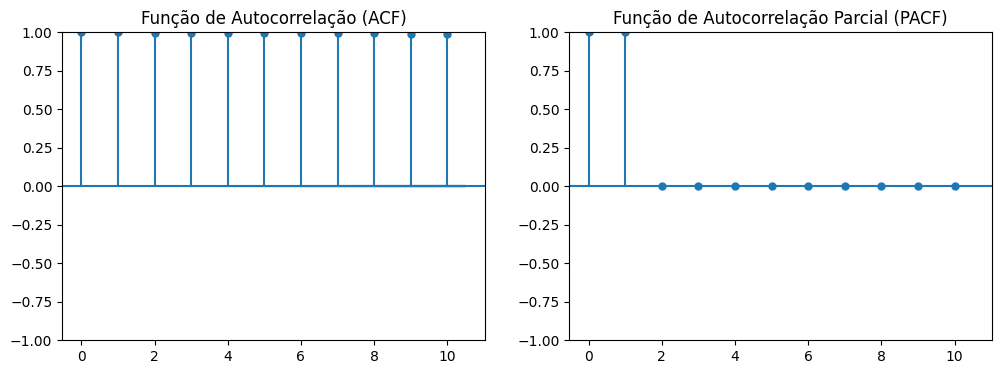

In [216]:
#Plotando os gráficos de ACF e PACF
fig, (ax1, ax2)= plt.subplots(1, 2, figsize= (12, 4))

#Plotando a Função de Autocorrelação (ACF) para até 10 lags
plot_acf(temp_merge['LandAverageTemperature'], lags= 10, ax= ax1)
ax1.set_title('Função de Autocorrelação (ACF)')

#Plotando a Função de Autocorrelação Parcial (PACF) para até 10 lags
plot_pacf(temp_merge['LandAverageTemperature'], lags= 10, ax= ax2)
ax2.set_title('Função de Autocorrelação Parcial (PACF)')

#Plotando os gráficos
plt.show()


Como todos os lags no gráfico ACF apresentaram-se no valor 1, pode-se concluir que ocorreu uma alta correlação com as observações nos atrasos anteriores. Esse comportamento pode indicar uma componente autorregressiva significativa na série temporal. Porém, a presença de correlações significativas em todos os lags também pode indicar que a série não é completamente estacionária.

No gráfico PACF, apenas os lags 0 e 2 são significativos, isso sugeriu que, após considerar a correlação direta com a observação imediatamente anterior (lag 0), a correlação com a observação com um atraso de 2 períodos (lag 2) é significativa, controlando os efeitos intermediários.

Dessa forma, conclui-se que para um possível modelo ARIMA onde, seriam estabelecidos valores:

p (ordem autorregressiva): 1, dada a correlação significativa com o lag 1 no ACF.
d (ordem de diferenciação): Pode ser necessário, pois a série pode não ser estacionária.
q (ordem da média móvel): 1, dado o lag 2 no PACF.

Dados os resultados das correlações ACF e PACF, pode-se considerar que a serie não está estacionária, como revelou o teste utilizando o método ADF. Isso pode ter ocorrido pelo fato do teste ADF ter sido executado em apenas uma amostra de 20% dos dados, dada a limitação de processament do ambiente utilizado para a construção desse noteboook.
Dessa forma, realizou-se o procedimento de diferenciação usando a função '.diff()' na variável 'serie', armazenando o resultado na variável 'serie2'; a fim de garantir que a serie trabalhada trata-se de uma série estacionária. Tendo em vista que a estacionariadade da série é um elemento importante para a construção do modelo.

In [87]:
#Calculando a diferença entre cada valor consecutivo da série (primeira diferença)
serie2= serie.diff()

#Removendo os NaN resultantes da diferenciação
serie2.dropna(inplace=True)


In [89]:
#Visualizando o resultado
serie2

dt
1850-01-01    0.0
1850-01-01    0.0
1850-01-01    0.0
1850-01-01    0.0
1850-01-01    0.0
             ... 
2013-09-01    0.0
2013-09-01    0.0
2013-09-01    0.0
2013-09-01    0.0
2013-09-01    0.0
Name: LandAverageTemperature, Length: 452457, dtype: float64

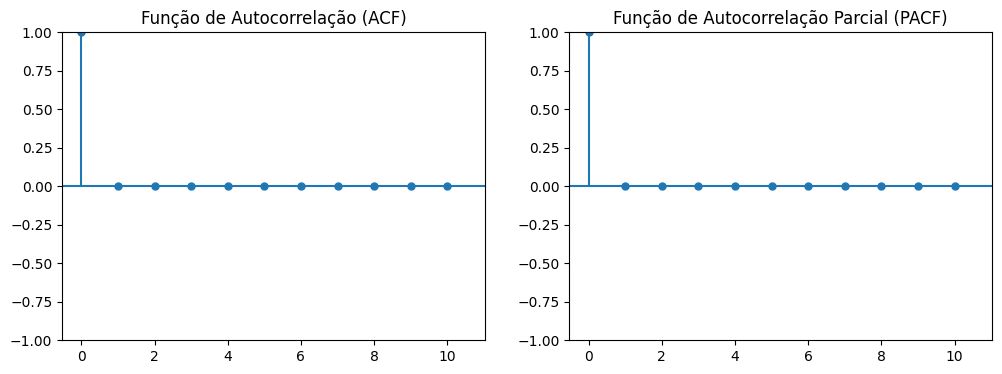

In [88]:
#Plotando os gráficos de ACF e PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (12, 4))

#Plotando a Função de Autocorrelação (ACF) para até 10 lags
plot_acf(serie2, lags= 10, ax= ax1)
ax1.set_title('Função de Autocorrelação (ACF)')

#Plotando a Função de Autocorrelação Parcial (PACF) para até 10 lags
plot_pacf(serie2, lags= 10, ax= ax2)
ax2.set_title('Função de Autocorrelação Parcial (PACF)')

#Plotando o gráfico
plt.show()


O valor significativo no lag 0 da função ACF, indicou que havia autocorrelação na própria série no tempo atual. No entanto, a rápida queda dos valores para zero nos lags subsequentes sugeriu que não houve autocorrelação significativa nas observações passadas após a diferenciação.
Já o valor significativo no lag 0 da função PACF,  indicou que havia uma correlação direta na própria série no tempo atual. A queda rápida dos valores para zero nos lags subsequentes sugere que não houve correlação significativa nas observações passadas após a diferenciação.
Concluiu-se então que a série diferenciada é estacionária e não possuía padrões de autocorrelação significativos, o que era desejável tendo em vista o objetivo de aplicar o modelo ARIMA.
O próximo passo seria explorar possíveis valores para p e q ao ajustar um modelo ARIMA à série temporal diferenciada.

**Conjunto de Treinamento e Teste**

Após a estacionarização e identificação dos parâmetros p e q para o modelo ARIMA, a próxima etapa seria a de separação dos dados em conjunto de treinamento e teste. O objetivo seria usar o conjunto de treinamento para treinar o modelo ARIMA e, em seguida, avaliar seu desempenho no conjunto de teste para verificar como ele se sai em dados não vistos.

Dessa forma, utilizou-se o método 'len()', para calcular o número total de pontos na série temporal. Em seguida, definiu-se o número de pontos de treinamento, calculado em 80% dos dados totais. Assim, dividiu-se os dados em 20% para o conjunto de teste e 80% para o conjunto de treinamento. Por fim, utilizou-se o método 'print()' para verificar a contagem total de pontos nos conjuntos de treinamento e teste, respectivamente.

In [90]:
total_pontos= len(serie) #Calculando o número total de pontos na série
pontos_treinamento= int(total_pontos * 0.8)  #Calculando 80% dos dados para treinamento

#Divisão de dados
treinamento= serie[:pontos_treinamento] #80% para dados de treinamento
teste= serie[pontos_treinamento:] #20% para dados de teste

#Exibindo os tamanhos dos conjuntos
print("Tamanho dos dados de treinamento:", len(treinamento))
print("Tamanho dos dados de teste:", len(teste))


Tamanho dos dados de treinamento: 361966
Tamanho dos dados de teste: 90492


#**Conclusão**
---

Ao analisarmos as médias de temperatura, tanto em um contexto regional quanto global, emerge uma clara tendência nos valores ao longo do tempo. De maneira abrangente, identificamos uma anomalia de elevação nas médias de temperatura ocorrida entre os anos de 1800 e 1850. A partir desse ponto, as médias de temperatura continuaram a demonstrar uma trajetória ascendente.

Esses resultados, que coincidem temporalmente com o advento da Revolução Industrial, marcam o início de transformações significativas nas atividades humanas, notadamente o aumento na queima de combustíveis fósseis e exploração desenfreada de outros recursos naturais.

Dessa forma, concluímos que os dados analisados  evidenciam um aumento nas temperaturas médias globais ao longo dos anos, apontando para uma correlação direta com os impactos das atividades humanas
